In [2]:
import csv
import codecs
import json
import folium
import datetime
import time
import sys
import graphviz

from skimage import io
import urllib.request

import dask.dataframe as dd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import rcParams

import math
import pickle
import os

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import scipy
import pdb
import warnings
from sklearn import linear_model

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
import pandas as pd
df = pd.read_parquet("yellow_tripdata_2024-01.parquet")
df.to_csv("yellow_tripdata_2024-01.csv")

In [4]:
URL =  "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/New%20York%20City%2C%20USA/2022-01-01/2022-01-15?unitGroup=us&include=hours&key=8DNM3VXP34HZMJMBEBKG44ETZ&contentType=csv"

print(' - Running query URL: ', URL)
print()

# Parse the results as CSV
CSVBytes = urllib.request.urlopen(URL)
CSVText = csv.reader(codecs.iterdecode(CSVBytes, 'utf-8'))
Location = 'New_York_City'
Start_Date = '2022-01-01'
End_Date = '20bbb22-01-15'
Output_dir = "/content/datasets"
Output_File = Output_dir + "weather_data_"+Location+"_"+Start_Date+"_"+End_Date+".csv"

with open(Output_File, mode='w',newline='') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for Row in CSVText:
        employee_writer.writerow(Row)

 - Running query URL:  https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/New%20York%20City%2C%20USA/2022-01-01/2022-01-15?unitGroup=us&include=hours&key=8DNM3VXP34HZMJMBEBKG44ETZ&contentType=csv



In [8]:

from bs4 import BeautifulSoup as bs
import requests

DOMAIN = ''
URL = 'https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page'
FILETYPE = '.parquet'

def get_soup(url):
    return bs(requests.get(url).text, 'html.parser')

input_dir = "/content/sample_data"

a = input("Enter the Year and month in format YYYY-MM: ")
FILETYPE = "yellow_tripdata_"+a + FILETYPE
for link in get_soup(URL).find_all('a'):
    file_link = link.get('href')
    if FILETYPE in file_link:
#        print(file_link)
#        print(link)
        with open(input_dir+FILETYPE, 'wb') as file:
            response = requests.get(file_link)
            file.write(response.content)
print("Successfully downloaded the file at this location: ", input_dir+FILETYPE)

Enter the Year and month in format YYYY-MM: 2022-03
Successfully downloaded the file at this location:  /content/sample_datayellow_tripdata_2022-03.parquet


In [9]:

from bs4 import BeautifulSoup as bs
import requests

DOMAIN = ''
URL = 'https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page'
FILETYPE = '.parquet'

def get_soup(url):
    return bs(requests.get(url).text, 'html.parser')

input_dir = "/content/sample_data"

a = input("Enter the Year and month in format YYYY-MM: ")
FILETYPE = "yellow_tripdata_"+a + FILETYPE
for link in get_soup(URL).find_all('a'):
    file_link = link.get('href')
    if FILETYPE in file_link:
#        print(file_link)
#        print(link)
        with open(input_dir+FILETYPE, 'wb') as file:
            response = requests.get(file_link)
            file.write(response.content)
print("Successfully downloaded the file at this location: ", input_dir+FILETYPE)

Enter the Year and month in format YYYY-MM: 2022-01
Successfully downloaded the file at this location:  /content/sample_datayellow_tripdata_2022-01.parquet


In [12]:
# read the data
input_dir = "/content/sample_data"
weather_input_dir = "/content/sample_data"

nyc_taxi_Jan_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-01.parquet")
#nyc_taxi_Feb_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-02.parquet")
#nyc_taxi_Mar_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-03.parquet")
#nyc_taxi_Apr_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-04.parquet")
#nyc_taxi_May_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-05.parquet")
#nyc_taxi_Jun_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-06.parquet")


m1 = dd.read_parquet(input_dir+"yellow_tripdata_2022-01.parquet")

In [ ]:
#Data cleaning

In [13]:
nyc_taxi_Jan_2022.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


from matplotlib import pyplot as plt
_df_0['VendorID'].plot(kind='hist', bins=20, title='VendorID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['passenger_count'].plot(kind='hist', bins=20, title='passenger_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['trip_distance'].plot(kind='hist', bins=20, title='trip_distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PULocationID'].plot(kind='hist', bins=20, title='PULocationID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='VendorID', y='passenger_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='passenger_count', y='trip_distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='trip_distance', y='PULocationID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PULocationID', y='DOLocationID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tpep_pickup_datetime']
  ys = series['passenger_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('tpep_pickup_datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tpep_pickup_datetime')
_ = plt.ylabel('passenger_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tpep_pickup_datetime']
  ys = series['trip_distance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('tpep_pickup_datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tpep_pickup_datetime')
_ = plt.ylabel('trip_distance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tpep_pickup_datetime']
  ys = series['PULocationID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('tpep_pickup_datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tpep_pickup_datetime')
_ = plt.ylabel('PULocationID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tpep_pickup_datetime']
  ys = series['DOLocationID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('tpep_pickup_datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tpep_pickup_datetime')
_ = plt.ylabel('DOLocationID')

from matplotlib import pyplot as plt
_df_12['VendorID'].plot(kind='line', figsize=(8, 4), title='VendorID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['passenger_count'].plot(kind='line', figsize=(8, 4), title='passenger_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['trip_distance'].plot(kind='line', figsize=(8, 4), title='trip_distance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['PULocationID'].plot(kind='line', figsize=(8, 4), title='PULocationID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
print(nyc_taxi_Jan_2022.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [15]:
nyc_taxi_Jan_2022.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [16]:
(nyc_taxi_Jan_2022.isnull().sum())/(nyc_taxi_Jan_2022.shape[0]) * 100

#(nyc_taxi_Jan_2022.isnull().sum()): calculates the total number of missing values for each column in the DataFrame
#(nyc_taxi_Jan_2022.shape[0]): retrieves the number of rows in the DataFrame

#calculates the percentage of missing values in each column of the DataFrame

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          2.901989
trip_distance            0.000000
RatecodeID               2.901989
store_and_fwd_flag       2.901989
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     2.901989
airport_fee              2.901989
dtype: float64

Roughly, around 3% of data has missing values. From the below, we can see that the same records have missing values. So we can drop them

In [17]:
nyc_taxi_Jan_2022[nyc_taxi_Jan_2022['passenger_count'].isna()].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2392428,2,2022-01-01 00:50:00,2022-01-01 00:54:00,NaN,1.00,NaN,None,68,246,0,13.20,0.0,0.5,1.75,0.0,0.3,18.25,NaN,NaN
2392429,2,2022-01-01 00:49:24,2022-01-01 01:27:36,NaN,13.31,NaN,None,257,223,0,44.87,0.0,0.5,10.05,0.0,0.3,55.72,NaN,NaN
2392430,2,2022-01-01 00:42:00,2022-01-01 00:56:00,NaN,2.87,NaN,None,143,236,0,13.23,0.0,0.5,3.51,0.0,0.3,20.04,NaN,NaN
2392431,2,2022-01-01 00:40:00,2022-01-01 00:55:00,NaN,3.24,NaN,None,143,262,0,14.19,0.0,0.5,3.72,0.0,0.3,21.21,NaN,NaN
2392432,2,2022-01-01 00:40:00,2022-01-01 00:52:00,NaN,2.19,NaN,None,239,166,0,13.20,0.0,0.5,5.25,0.0,0.3,21.75,NaN,NaN
2392433,1,2022-01-01 00:18:10,2022-01-01 00:30:29,NaN,1.80,NaN,None,79,164,0,9.50,0.5,0.5,2.00,0.0,0.3,15.30,NaN,NaN
2392434,2,2022-01-01 00:33:22,2022-01-01 01:07:32,NaN,5.82,NaN,None,90,151,0,20.83,0.0,0.5,5.20,0.0,0.3,29.33,NaN,NaN
2392435,2,2022-01-01 00:21:00,2022-01-01 00:33:00,NaN,2.47,NaN,None,142,140,0,13.20,0.0,0.5,3.50,0.0,0.3,20.00,NaN,NaN
2392436,2,2022-01-01 00:47:03,2022-01-01 01:08:11,NaN,4.91,NaN,None,231,143,0,20.88,0.0,0.5,3.91,0.0,0.3,28.09,NaN,NaN
2392437,2,2022-01-01 00:32:00,2022-01-01 00:39:00,NaN,1.30,NaN,None,239,142,0,13.20,0.0,0.5,1.00,0.0,0.3,17.50,NaN,NaN


In [18]:
nyc_taxi_Jan_2022.dropna(inplace=True)

# removes any rows from the DataFrame nyc_taxi_Jan_2022 that contain missing values (NaN) and modifies the DataFrame in place

In [19]:
(nyc_taxi_Jan_2022.isnull().sum())/(nyc_taxi_Jan_2022.shape[0]) * 100 #percentage of missing values in each column

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64

**Passenger count**

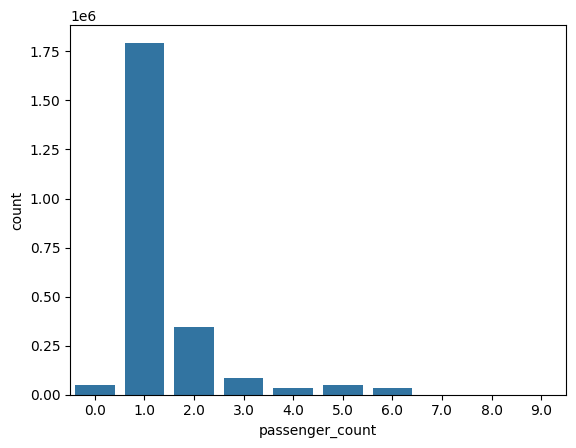

In [20]:
#the distribution of passenger counts in the NYC taxi dataset for January 2022

ax = sns.countplot(x="passenger_count",data=nyc_taxi_Jan_2022)


In [21]:
nyc_taxi_Jan_2022[nyc_taxi_Jan_2022['passenger_count'] == 0].count()

VendorID                 52061
tpep_pickup_datetime     52061
tpep_dropoff_datetime    52061
passenger_count          52061
trip_distance            52061
RatecodeID               52061
store_and_fwd_flag       52061
PULocationID             52061
DOLocationID             52061
payment_type             52061
fare_amount              52061
extra                    52061
mta_tax                  52061
tip_amount               52061
tolls_amount             52061
improvement_surcharge    52061
total_amount             52061
congestion_surcharge     52061
airport_fee              52061
dtype: int64

The second column indicates the count of non-null values for that particular column.

In [22]:
nyc_taxi_Jan_2022.shape

(2392428, 19)

In [23]:
#dropping the rows which has 0 passengers count

In [24]:
indexAge = nyc_taxi_Jan_2022[ (nyc_taxi_Jan_2022['passenger_count'] == 0)].index
nyc_taxi_Jan_2022.drop(indexAge , inplace=True)
display(nyc_taxi_Jan_2022.shape)
nyc_taxi_Jan_2022.head(15)

(2340367, 19)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.00,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.00,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.00,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.00,0.3,30.30,2.5,0.0
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.30,1.0,N,138,161,1,33.0,3.0,0.5,13.00,6.55,0.3,56.35,2.5,0.0
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.0,0.5,0.5,5.20,0.00,0.3,26.00,2.5,0.0
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1.0,2.02,1.0,N,238,152,2,9.0,0.5,0.5,0.00,0.00,0.3,12.80,2.5,0.0
8,2,2022-01-01 00:30:02,2022-01-01 00:44:49,1.0,2.71,1.0,N,166,236,1,12.0,0.5,0.5,2.25,0.00,0.3,18.05,2.5,0.0
9,2,2022-01-01 00:48:52,2022-01-01 00:53:28,1.0,0.78,1.0,N,236,141,2,5.0,0.5,0.5,0.00,0.00,0.3,8.80,2.5,0.0


In [25]:
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

def return_with_trip_times(month):

    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in month['tpep_pickup_datetime'].astype(str)]
    duration_drop = [convert_to_unix(x) for x in month['tpep_dropoff_datetime'].astype(str)]

    #calculate duration of trips
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','PULocationID', 'DOLocationID']]

    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])

    return new_frame

# print(frame_with_durations.head())
#  passenger_count	trip_distance	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	total_amount	trip_times	pickup_times	Speed
#   1                  1.59	      -73.993896        	40.750111    	-73.974785      	40.750618           	17.05   	 18.050000	1.421329e+09	5.285319
#   1               	3.30    	-74.001648      	40.724243   	-73.994415      	40.759109           	17.80   	19.833333	1.420902e+09	9.983193
#   1               	1.80     	-73.963341      	40.802788     	-73.951820      	40.824413           	10.80   	10.050000	1.420902e+09	10.746269
#   1               	0.50    	-74.009087      	40.713818    	-74.004326       	40.719986           	4.80    	1.866667	1.420902e+09	16.071429
#   1               	3.00    	-73.971176      	40.762428    	-74.004181      	40.742653           	16.30   	19.316667	1.420902e+09	9.318378

frame_with_durations = return_with_trip_times(nyc_taxi_Jan_2022)

In [27]:
frame_with_durations.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,trip_times,pickup_times,Speed
0,2.0,3.80,142,236,17.816667,1.640997e+09,12.797007
1,1.0,2.10,236,42,8.400000,1.640997e+09,15.000000
2,1.0,0.97,166,166,8.966667,1.640998e+09,6.490706
3,1.0,1.09,114,68,10.033333,1.640997e+09,6.518272
4,1.0,4.30,68,163,37.533333,1.640997e+09,6.873890


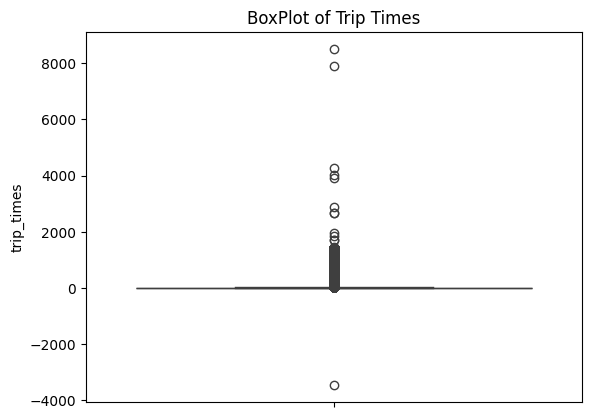

In [28]:
%matplotlib inline


# the skewed box plot shows us the presence of outliers
sns.boxplot(y="trip_times", data =frame_with_durations).set(title='BoxPlot of Trip Times')
plt.show()

In [32]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -3442.4
10 percentile value is 4.016666666666667
20 percentile value is 5.566666666666666
30 percentile value is 7.0
40 percentile value is 8.466666666666667
50 percentile value is 10.1
60 percentile value is 12.033333333333333
70 percentile value is 14.483333333333333
80 percentile value is 17.983333333333334
90 percentile value is 24.5
100 percentile value is  8513.183333333332


In [33]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 24.5
91 percentile value is 25.566666666666666
92 percentile value is 26.783333333333335
93 percentile value is 28.183333333333334
94 percentile value is 29.816666666666666
95 percentile value is 31.766666666666666
96 percentile value is 34.166666666666664
97 percentile value is 37.25
98 percentile value is 41.666666666666664
99 percentile value is 49.61666666666667
100 percentile value is  8513.183333333332


In [37]:
import numpy as np

# Create a range from 90 to 100 with increments of 0.1
percentile_range = np.arange(99, 100, 0.01)

# Loop over the percentile range
for i in percentile_range:
    # Calculate the percentile value
    percentile_value = np.percentile(frame_with_durations["trip_times"].values, i)
    # Print the percentile value
    print("{:.2f} percentile value is {:.2f}".format(i, percentile_value))


99.00 percentile value is 49.62
99.01 percentile value is 49.73
99.02 percentile value is 49.85
99.03 percentile value is 49.99
99.04 percentile value is 50.10
99.05 percentile value is 50.23
99.06 percentile value is 50.37
99.07 percentile value is 50.48
99.08 percentile value is 50.62
99.09 percentile value is 50.75
99.10 percentile value is 50.88
99.11 percentile value is 51.00
99.12 percentile value is 51.15
99.13 percentile value is 51.30
99.14 percentile value is 51.45
99.15 percentile value is 51.57
99.16 percentile value is 51.72
99.17 percentile value is 51.85
99.18 percentile value is 52.00
99.19 percentile value is 52.18
99.20 percentile value is 52.35
99.21 percentile value is 52.52
99.22 percentile value is 52.68
99.23 percentile value is 52.85
99.24 percentile value is 53.02
99.25 percentile value is 53.18
99.26 percentile value is 53.37
99.27 percentile value is 53.55
99.28 percentile value is 53.75
99.29 percentile value is 53.94
99.30 percentile value is 54.10
99.31 pe

adds trip duration, pickup times, and speed information from frame_with_durations to the nyc_taxi_Jan_2022 DataFrame and then removes rows with trip times outside the range of 1 to 720(550) minutes, likely to clean the data and remove outliers or erroneous entries

In [38]:

#removing data based on our analysis and TLC regulations

nyc_taxi_Jan_2022['trip_times'] = frame_with_durations['trip_times']
nyc_taxi_Jan_2022['pickup_times'] = frame_with_durations['pickup_times']
nyc_taxi_Jan_2022['Speed'] = frame_with_durations['Speed']

frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<720)]
nyc_taxi_Jan_2022=nyc_taxi_Jan_2022[(nyc_taxi_Jan_2022.trip_times>1) & (nyc_taxi_Jan_2022.trip_times<720)]

In [39]:
nyc_taxi_Jan_2022.shape

(2311778, 22)

In [31]:
frame_with_durations_modified.shape

(2311778, 7)

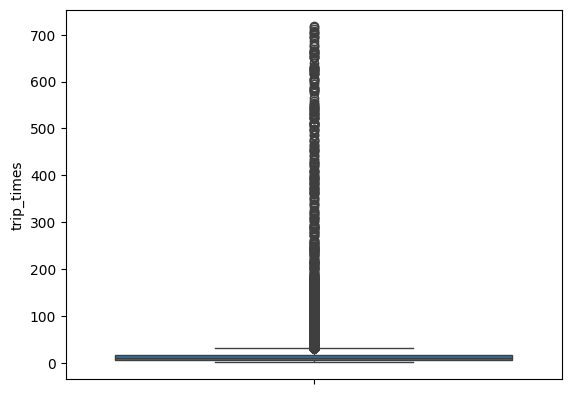

In [40]:
%matplotlib inline


#box-plot after removal of outliers
sns.boxplot(y="trip_times", data =nyc_taxi_Jan_2022)
plt.show()

** Speed **

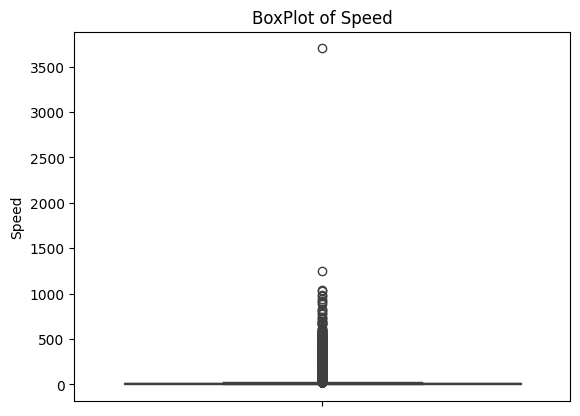

In [41]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])
sns.boxplot(y="Speed", data =frame_with_durations_modified).set(title='BoxPlot of Speed')
plt.show()

In [42]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100
for i in range(0,100,10):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 6.961832061068703
20 percentile value is 8.224299065420562
30 percentile value is 9.194366197183099
40 percentile value is 10.10888252148997
50 percentile value is 11.072509960159362
60 percentile value is 12.198636806231741
70 percentile value is 13.695104895104897
80 percentile value is 16.072892938496583
90 percentile value is 21.58730158730159
100 percentile value is  3701.5384615384614


In [43]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))

90 percentile value is 21.58730158730159
91 percentile value is 22.57946370176586
92 percentile value is 23.677441306566855
93 percentile value is 24.913566113337147
94 percentile value is 26.324517512508933
95 percentile value is 27.9589216944801
96 percentile value is 29.838218053927317
97 percentile value is 32.0539629005059
98 percentile value is 34.81057268722466
99 percentile value is 38.674169949352844


In [44]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 38.674169949352844
99.1 percentile value is 39.18616480162767
99.2 percentile value is 39.755619596541784
99.3 percentile value is 40.353706111833546
99.4 percentile value is 41.03141928494041
99.5 percentile value is 41.777188328912466
99.6 percentile value is 42.69421487603306
99.7 percentile value is 43.86329866270431
99.8 percentile value is 45.45542168674699
99.9 percentile value is 48.250673854447435
100 percentile value is  3701.5384615384614


In [45]:

#removing further outliers based on the 99.9th percentile value
#frame_with_durations_modified=frame_with_durations[(frame_with_durations.Speed>0) & (frame_with_durations.Speed<48.25)]


nyc_taxi_Jan_2022=nyc_taxi_Jan_2022[(nyc_taxi_Jan_2022.Speed>0) & (nyc_taxi_Jan_2022.Speed<48.25)]

In [46]:
#avg.speed of cabs in New-York
sum(nyc_taxi_Jan_2022["Speed"]) / float(len(nyc_taxi_Jan_2022["Speed"]))

12.930126622008087

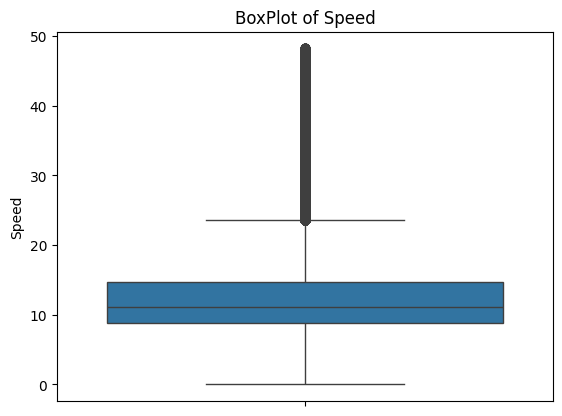

In [47]:
nyc_taxi_Jan_2022['Speed'] = 60*(nyc_taxi_Jan_2022['trip_distance']/nyc_taxi_Jan_2022['trip_times'])
sns.boxplot(y="Speed", data =nyc_taxi_Jan_2022).set(title='BoxPlot of Speed')
plt.show()

** Total Amount **

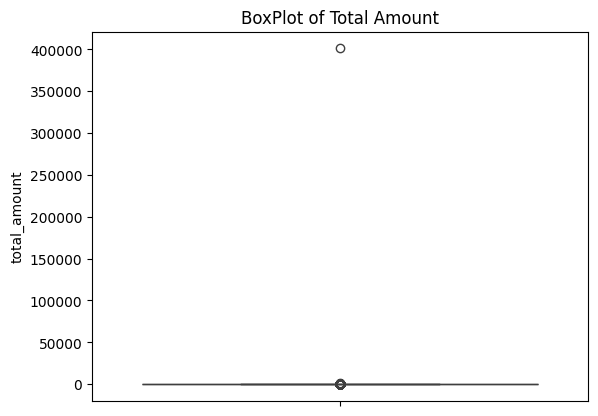

In [48]:
# up to now we have removed the outliers based on trip durations, cab speeds, and trip distances
# lets try if there are any outliers in based on the total_amount
# box-plot showing outliers in fare
sns.boxplot(y="total_amount", data =nyc_taxi_Jan_2022).set(title='BoxPlot of Total Amount')
plt.show()

In [49]:

#calculating total fare amount values at each percntile 0,10,20,30,40,50,60,70,80,90,100
for i in range(0,10):
    var = nyc_taxi_Jan_2022["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))

0 percentile value is -253.3
1 percentile value is 6.8
2 percentile value is 7.3
3 percentile value is 7.8
4 percentile value is 8.3
5 percentile value is 8.75
6 percentile value is 8.8
7 percentile value is 8.8
8 percentile value is 9.3
9 percentile value is 9.3


In [50]:
for i in range(10,100,10):
    var = nyc_taxi_Jan_2022["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))

10 percentile value is 9.36
20 percentile value is 10.8
30 percentile value is 11.8
40 percentile value is 12.96
50 percentile value is 14.3
60 percentile value is 15.96
70 percentile value is 18.3
80 percentile value is 21.8
90 percentile value is 32.25


In [51]:
#calculating total fare amount values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = nyc_taxi_Jan_2022["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))

90 percentile value is 32.25
91 percentile value is 35.05
92 percentile value is 38.3
93 percentile value is 41.85
94 percentile value is 45.42
95 percentile value is 49.8
96 percentile value is 55.85
97 percentile value is 63.1
98 percentile value is 70.26
99 percentile value is 75.72


In [53]:
for i in np.arange(0.0, 1.0, 0.1):
    var =nyc_taxi_Jan_2022["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 75.72
99.1 percentile value is 75.72
99.2 percentile value is 76.31
99.3 percentile value is 77.87
99.4 percentile value is 78.88
99.5 percentile value is 80.46
99.6 percentile value is 81.12
99.7 percentile value is 84.3
99.8 percentile value is 91.86
99.9 percentile value is 108.55
100 percentile value is  401095.62


As for the 0th percentile, value is an outlier.

As even the 99.9th percentile value doesnt look like an outlier

In [54]:
# Create a range from 99 to 100 with increments of 0.01
percentile_range = np.arange(99.0, 100.01, 0.01)

# Loop over the percentile range
for i in percentile_range:
    # Calculate the percentile value
    percentile_value = np.percentile(nyc_taxi_Jan_2022["total_amount"].values, i)
    # Print the percentile value
    print("{:.2f} percentile value is {:.2f}".format(i, percentile_value))

# Print the 100th percentile value
print("100 percentile value is {:.2f}".format(np.max(nyc_taxi_Jan_2022["total_amount"].values)))

99.00 percentile value is 75.72
99.01 percentile value is 75.72
99.02 percentile value is 75.72
99.03 percentile value is 75.72
99.04 percentile value is 75.72
99.05 percentile value is 75.72
99.06 percentile value is 75.72
99.07 percentile value is 75.72
99.08 percentile value is 75.72
99.09 percentile value is 75.72
99.10 percentile value is 75.72
99.11 percentile value is 75.72
99.12 percentile value is 75.72
99.13 percentile value is 75.72
99.14 percentile value is 75.72
99.15 percentile value is 75.72
99.16 percentile value is 75.72
99.17 percentile value is 75.72
99.18 percentile value is 75.75
99.19 percentile value is 76.05
99.20 percentile value is 76.31
99.21 percentile value is 76.55
99.22 percentile value is 76.80
99.23 percentile value is 77.15
99.24 percentile value is 77.30
99.25 percentile value is 77.31
99.26 percentile value is 77.31
99.27 percentile value is 77.55
99.28 percentile value is 77.60
99.29 percentile value is 77.62
99.30 percentile value is 77.87
99.31 pe

ValueError: Percentiles must be in the range [0, 100]

In [57]:
# So remove the values above 200 dollars (Change thisssssssssssssss)

nyc_taxi_Jan_2022[(nyc_taxi_Jan_2022['total_amount']<0) | (nyc_taxi_Jan_2022['total_amount']>1000)].count()

VendorID                 9826
tpep_pickup_datetime     9826
tpep_dropoff_datetime    9826
passenger_count          9826
trip_distance            9826
RatecodeID               9826
store_and_fwd_flag       9826
PULocationID             9826
DOLocationID             9826
payment_type             9826
fare_amount              9826
extra                    9826
mta_tax                  9826
tip_amount               9826
tolls_amount             9826
improvement_surcharge    9826
total_amount             9826
congestion_surcharge     9826
airport_fee              9826
trip_times               9826
pickup_times             9826
Speed                    9826
dtype: int64

In [ ]:
nyc_taxi_Jan_2022=nyc_taxi_Jan_2022[(nyc_taxi_Jan_2022['total_amount']>0) & (nyc_taxi_Jan_2022['total_amount']<1000)]

In [59]:
nyc_taxi_Jan_2022=nyc_taxi_Jan_2022[(nyc_taxi_Jan_2022['total_amount']>0) & (nyc_taxi_Jan_2022['total_amount']<1000)]

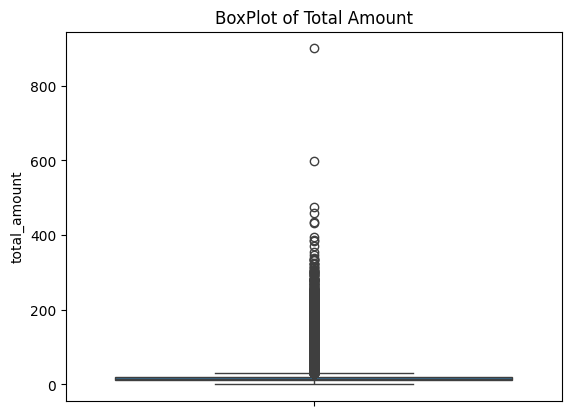

In [60]:
sns.boxplot(y="total_amount", data =nyc_taxi_Jan_2022).set(title='BoxPlot of Total Amount')
plt.show()

Pickup and Drop of Time:

In [61]:
nyc_taxi_Jan_2022['tpep_pickup_datetime'].min()

Timestamp('2008-12-31 23:03:01')

In [62]:
nyc_taxi_Jan_2022['tpep_dropoff_datetime'].max()

Timestamp('2022-05-18 20:47:45')

In [63]:
nyc_taxi_Jan_2022.shape

(2289580, 22)

In [64]:
indexAge = nyc_taxi_Jan_2022[(nyc_taxi_Jan_2022['tpep_pickup_datetime'] < '2022-01-01 00:00:00') ].index
nyc_taxi_Jan_2022.drop(indexAge , inplace=True)

In [65]:
indexAge = nyc_taxi_Jan_2022[nyc_taxi_Jan_2022['tpep_pickup_datetime'] > '2022-02-01 00:00:00'].index
nyc_taxi_Jan_2022.drop(indexAge , inplace=True)

In [66]:
nyc_taxi_Jan_2022[nyc_taxi_Jan_2022['tpep_dropoff_datetime'] > '2022-02-01 12:00:00']

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_times,pickup_times,Speed


This code filters the DataFrame nyc_taxi_Jan_2022 to select rows where the 'tpep_dropoff_datetime' column contains a datetime value that is after February 1, 2022, at 12:00:00 PM.

In [67]:
nyc_taxi_Jan_2022.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_times,pickup_times,Speed
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667,1.640997e+09,12.797007
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000,1.640997e+09,15.000000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667,1.640998e+09,6.490706
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333,1.640997e+09,6.518272
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333,1.640997e+09,6.873890


In [68]:
# save the data
output_dir = "/content/sample_data"
nyc_taxi_Jan_2022.to_csv(output_dir+"yellow_tripdata_2022-01_cleaned.csv")

Data visualizations

In [70]:
# read the data
input_dir = "/content/sample_data"
#weather_input_dir = "D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/Weather_Data/"

nyc_taxi_Jan_2022_cleaned = pd.read_csv(input_dir+"yellow_tripdata_2022-01_cleaned.csv")
#nyc_taxi_Feb_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-02.parquet")
#nyc_taxi_Mar_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-03.parquet")
#nyc_taxi_Apr_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-04.parquet")
#nyc_taxi_May_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-05.parquet")
#nyc_taxi_Jun_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-06.parquet")


#weather_data_Jan_2022 =  pd.read_csv(weather_input_dir+"weather_data_Jan_2022_cleaned.csv")

In [73]:
nyc_taxi_Jan_2022_cleaned.drop(columns=['Unnamed: 0'], inplace =True)
nyc_taxi_Jan_2022_cleaned['tpep_pickup_datetime']= pd.to_datetime(nyc_taxi_Jan_2022_cleaned['tpep_pickup_datetime'])
nyc_taxi_Jan_2022_cleaned['tpep_dropoff_datetime']= pd.to_datetime(nyc_taxi_Jan_2022_cleaned['tpep_dropoff_datetime'])

In [74]:
#count the number of taxi trips for each day of the week
nyc_taxi_Jan_2022_cleaned['WeekDay'] = nyc_taxi_Jan_2022_cleaned['tpep_pickup_datetime'].dt.day_name()

WeekDayCount = pd.DataFrame()
WeekDayCount['Count']=nyc_taxi_Jan_2022_cleaned.groupby(['WeekDay'])['WeekDay'].count()
WeekDayCount = WeekDayCount.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])

In [75]:
WeekDayCount

,Count
WeekDay,
Monday,347355
Tuesday,303052
Wednesday,316388
Thursday,332325
Friday,336029
Saturday,337441
Sunday,316946


Text(0.5, 1.0, 'Count indicating the Taxi rides')

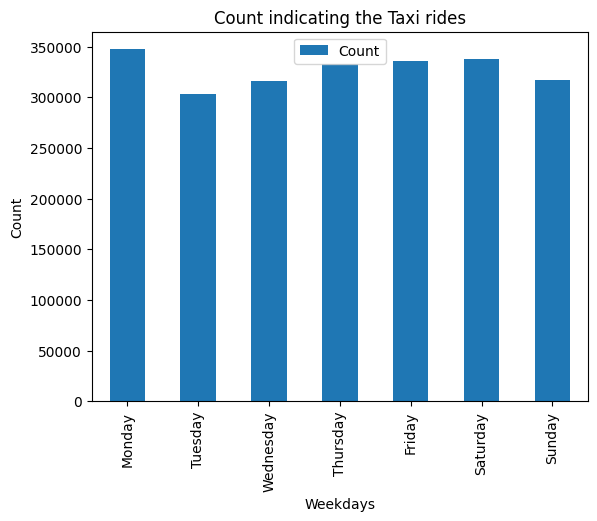

In [76]:
WeekDayCount.plot(kind="bar")
plt.xlabel('Weekdays')
plt.ylabel('Count')
plt.title("Count indicating the Taxi rides")

In [78]:
nyc_taxi_Jan_2022_cleaned.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
trip_times                      float64
pickup_times                    float64
Speed                           float64
WeekDay                          object
dtype: object

In [84]:
# load the Auto dataset
auto_df = nyc_taxi_Jan_2022_cleaned

# Select only numeric columns
numeric_columns = auto_df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
corr = auto_df[numeric_columns].corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .format("{:,.2f}".format)\
    .set_table_styles(magnify())

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_times,pickup_times,Speed
VendorID,1.00,0.10,0.01,-0.09,-0.01,-0.00,-0.02,0.00,-0.88,0.01,0.02,0.01,-0.00,0.01,0.01,0.02,-0.01,-0.00,0.05
passenger_count,0.10,1.00,0.02,-0.02,-0.01,-0.00,0.01,0.02,-0.08,-0.01,0.01,0.02,0.00,0.02,0.01,0.01,0.01,-0.02,0.02
trip_distance,0.01,0.02,1.00,0.10,-0.12,-0.10,0.01,0.96,0.02,-0.16,0.55,0.64,0.00,0.95,-0.34,0.68,0.73,-0.05,0.76
RatecodeID,-0.09,-0.02,0.10,1.00,-0.04,-0.03,-0.03,0.14,-0.05,-0.02,-0.03,0.07,-0.00,0.10,-0.21,0.00,0.14,0.01,0.02
PULocationID,-0.01,-0.01,-0.12,-0.04,1.00,0.08,-0.03,-0.11,0.01,0.01,-0.05,-0.07,-0.00,-0.11,0.14,-0.13,-0.08,0.01,-0.11
DOLocationID,-0.00,-0.00,-0.10,-0.03,0.08,1.00,-0.04,-0.10,0.01,0.04,-0.04,-0.05,-0.00,-0.09,0.13,-0.06,-0.09,0.01,-0.09
payment_type,-0.02,0.01,0.01,-0.03,-0.03,-0.04,1.00,0.01,-0.01,-0.01,-0.44,-0.01,-0.00,-0.08,-0.11,0.03,0.01,-0.04,-0.00
fare_amount,0.00,0.02,0.96,0.14,-0.11,-0.10,0.01,1.00,0.01,-0.26,0.55,0.63,-0.01,0.98,-0.34,0.62,0.77,-0.02,0.66
extra,-0.88,-0.08,0.02,-0.05,0.01,0.01,-0.01,0.01,1.00,0.02,0.03,0.03,0.00,0.04,0.12,0.02,0.02,0.02,-0.02
mta_tax,0.01,-0.01,-0.16,-0.02,0.01,0.04,-0.01,-0.26,0.02,1.00,-0.13,-0.33,0.03,-0.26,0.15,-0.02,-0.09,0.01,-0.12


**Highest number of Pick and Drop points**

In [85]:
np.random.seed(5)
plot_df = (
    nyc_taxi_Jan_2022_cleaned['PULocationID'].value_counts()
        .head(10)
        .rename_axis('value')
        .reset_index(name='counts')
)

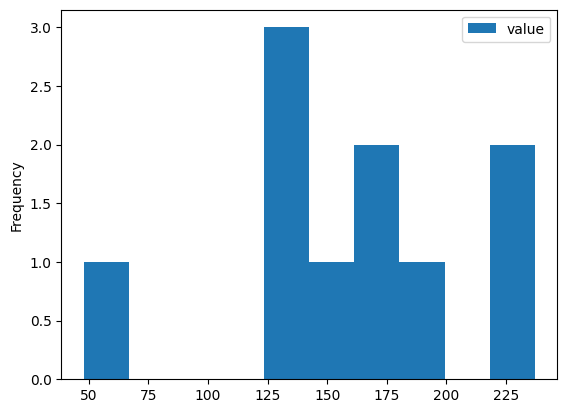

In [86]:
ax = plot_df.plot(x='counts', kind='hist')

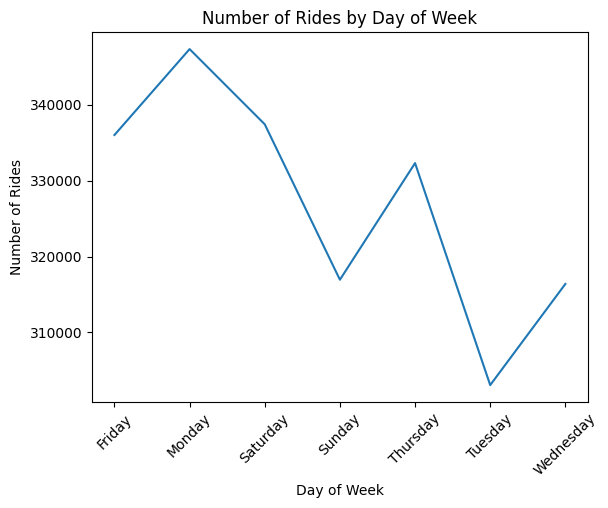

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset and calculate number of rides by day of the week
df = nyc_taxi_Jan_2022_cleaned
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_name()
grouped_df = df.groupby(["day_of_week"]).count()["fare_amount"]

# plot line chart
sns.lineplot(x=grouped_df.index, y=grouped_df.values)
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by Day of Week")
plt.xticks(rotation=45)
plt.show()

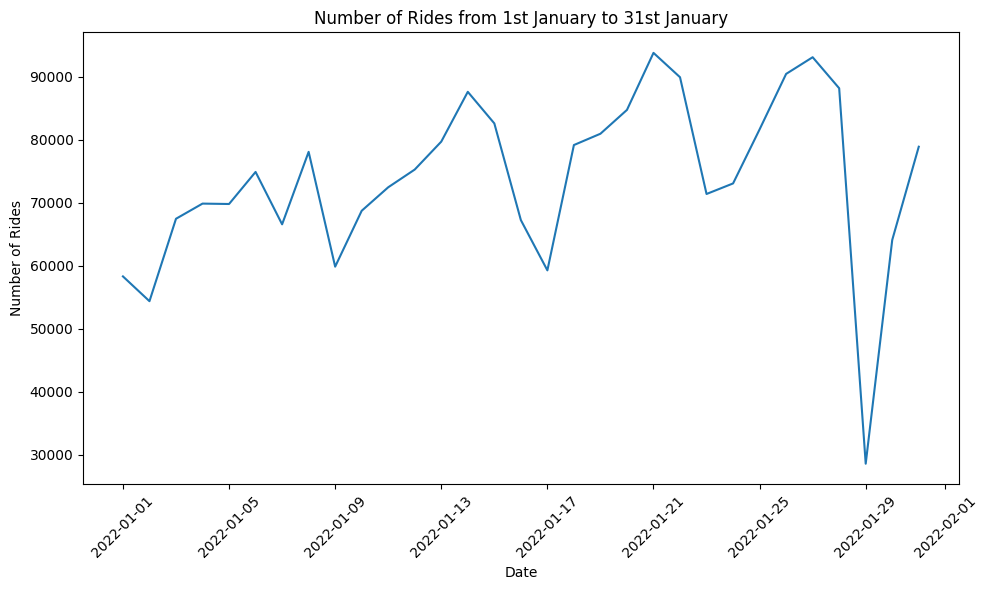

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset and calculate number of rides by date
df = nyc_taxi_Jan_2022_cleaned
df["pickup_date"] = df["tpep_pickup_datetime"].dt.date
grouped_df = df.groupby(["pickup_date"]).size()

# plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=grouped_df.index, y=grouped_df.values)
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.title("Number of Rides from 1st January to 31st January")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**The distribution of No. of pickups and dropoff on each part of the day**

In [89]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'

# load your dataset into a pandas dataframe
df = nyc_taxi_Jan_2022_cleaned
df['pickup_timezone']=df['tpep_pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['tpep_dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

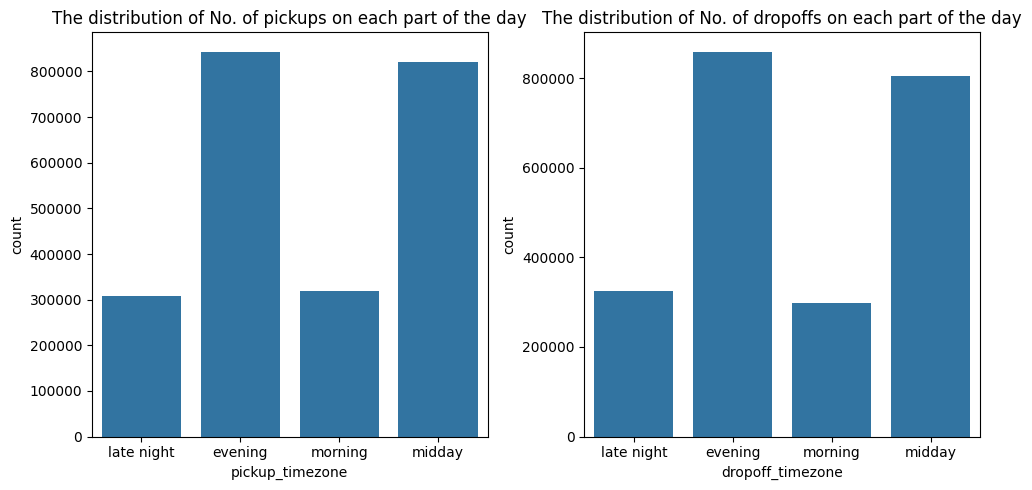

In [90]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of No. of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of No. of dropoffs on each part of the day')

#plt.show()
plt.tight_layout()

[Text(0.5, 1.0, 'Pickup hour vs Trip Duration')]

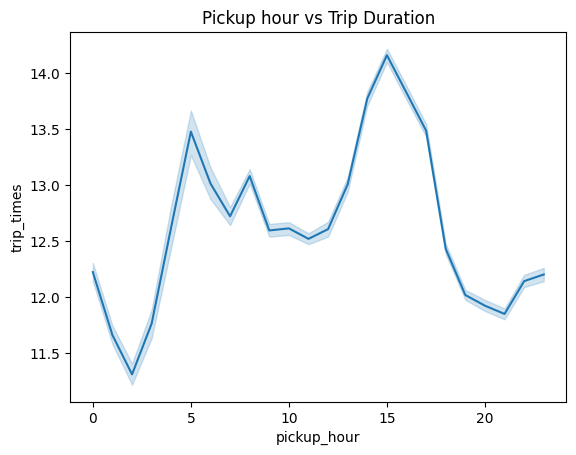

In [91]:
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
sns.lineplot(x='pickup_hour',y='trip_times',data=df).set(title="Pickup hour vs Trip Duration")